In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt
#for date calculations
#https://stackoverflow.com/questions/5871168/how-can-i-subtract-or-add-100-years-to-a-datetime-field-in-the-database-in-djang
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [43]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by((Measurement.date).desc()).limit(1).all()
# the date string is in a list of lists
print(recent_date[0][0])

2017-08-23


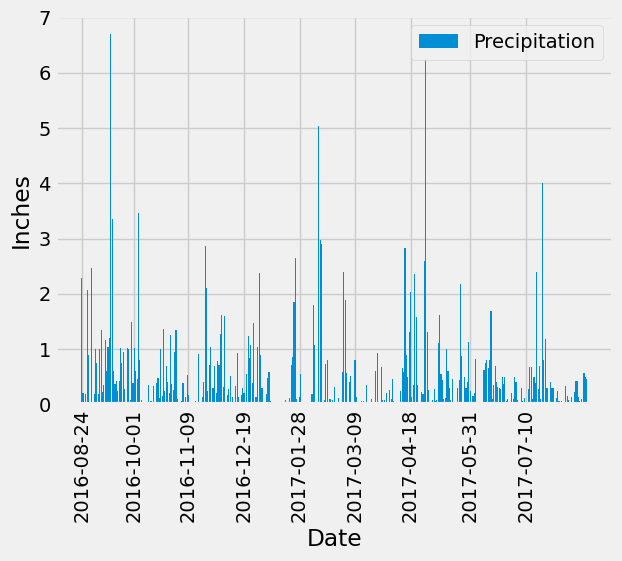

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#string splitting
#https://www.w3schools.com/python/ref_string_split.asp
date_str_list = recent_date[0][0].split("-")
#subtract year
#https://stackoverflow.com/questions/5871168/how-can-i-subtract-or-add-100-years-to-a-datetime-field-in-the-database-in-djang
date_val = dt.date(int(date_str_list[0]),int(date_str_list[1]),int(date_str_list[2]))
start_time = date_val - relativedelta(years=1)
# Perform a query to retrieve the data and precipitation scores
last_year_query = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > start_time).\
                  order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_precipitation_df = pd.DataFrame(last_year_query,columns=["precipitation","date"])
year_precipitation_df["date"] = year_precipitation_df["date"].astype(str)
# Sort the dataframe by date
#sorting code
#https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/
year_precipitation_df.sort_values(by=["date"])
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(x=year_precipitation_df["date"],height=year_precipitation_df["precipitation"])
plt.xticks(ticks=["2016-08-24","2016-10-01","2016-11-09","2016-12-19","2017-01-28","2017-03-09","2017-04-18","2017-05-31","2017-07-10"]
           ,labels=["2016-08-24","2016-10-01","2016-11-09","2016-12-19","2017-01-28","2017-03-09","2017-04-18","2017-05-31","2017-07-10"]
           ,rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"])


In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
#describe
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
year_precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).distinct().count()
station_count

9

In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station_query = session.query(Measurement.station, func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
active_station_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
             filter(Measurement.station == 'USC00519281').all()
temp_query
            


[(54.0, 85.0, 71.66378066378067)]

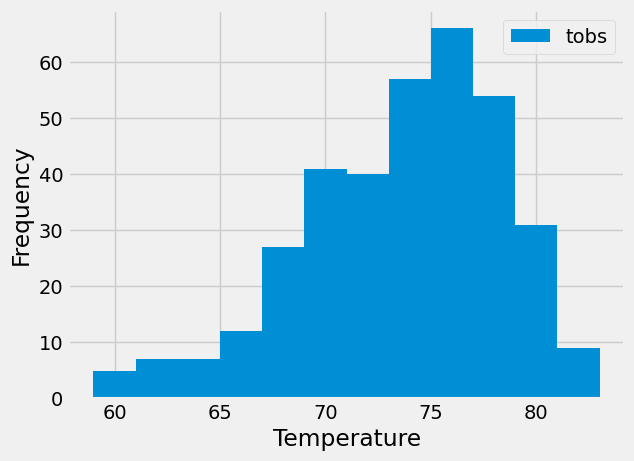

In [66]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#copying earlier code
recent_date_station = session.query(Measurement.date).\
                      filter(Measurement.station == active_station_query[0][0]).\
                      order_by((Measurement.date).desc()).limit(1).all()
date_str_list = recent_date_station[0][0].split("-")
date_val = dt.date(int(date_str_list[0]),int(date_str_list[1]),int(date_str_list[2]))
start_time = date_val - relativedelta(years=1)
year_temps = session.query(Measurement.tobs).filter(Measurement.station == active_station_query[0][0]).filter(Measurement.date > start_time).all()
temps_df = pd.DataFrame(year_temps,columns=["tobs"])
plt.hist(temps_df, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])


# Close Session

In [34]:
# Close Session
session.close()